In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plotly.offline.init_notebook_mode (connected = True)

import ipywidgets as widgets

# Colors used
colors = ['#FF5851', '#3d9dfc', '#d852fa', '#494a49', '#212121' , '#ffffff', '#727372', '#03fc39']

In [2]:
df = pd.read_csv("D:\\programming stuff\\pythone\\projects\\Credit Card Fraud Detection\\creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df_eda = df.copy()
df_eda["Hours"] = round(df['Time']/3600)

In [7]:
fig = go.Figure(data=[go.Pie(labels=["Non Fraud", "Fraud"], values=df_eda['Class'].value_counts(), pull=[0, 0.2])])
fig.update_layout(title_text="Fraud-Non Fraud (Class) Distribution", plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5])
fig.update_traces(marker=dict(colors=[colors[1], colors[0]]))
fig.show()

In [8]:
# Transaction count with non frauds over time(Hours)
count_0 = df_eda[df_eda['Class']==0].groupby('Hours').count()["Class"]

# Transaction count with frauds over time(Hours)
count_1 = df_eda[df_eda['Class']==1].groupby('Hours').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
counts_df["ratio"] = (counts_df["Class 1"]/counts_df["Class 0"]).fillna(0)

# Removing inf values generated due to (0/0)
df_counts = counts_df[counts_df['ratio'] != np.inf].reset_index()

# Subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Non Frauds","Frauds", "Ratio of (Frauds / Non Frauds)"))


fig.add_trace(go.Scatter(x=df_counts["Hours"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : colors[1]}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hours"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : colors[0]}),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=df_counts["Hours"], y=df_counts["ratio"], name="Transactions", marker = {'color' : colors[2]}),
                 row=2, col=1)

# Layout and axes configs
fig.update_layout(showlegend=False, title_text="Transactions Over Time", height=650, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5])
fig.update_xaxes(gridcolor=colors[6], color = colors[5])
fig.update_yaxes(gridcolor=colors[6], color = colors[5])

# Axes labels
fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'
fig['layout']['xaxis3']['title']='Hour'
fig['layout']['yaxis3']['title']='Fraud / Non Fraud (Transaction)'

fig.show()

In [9]:
# Transaction count with non frauds over Amount
amount_0 = df_eda[df_eda['Class']==0].groupby('Amount').count()["Class"]

# Transaction count with frauds over Amount
amount_1 = df_eda[df_eda['Class']==1].groupby('Amount').count()["Class"]

# Concatenate
amounts_df = pd.concat([amount_0, amount_1], axis=1, keys=["Class 0", "Class 1"])
amounts_df["ratio"] = (amounts_df["Class 1"]/amounts_df["Class 0"])

# Removing inf values generated due to (0/0)
df_amounts = amounts_df[amounts_df['ratio'] != np.inf].reset_index()

# Subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]],
    subplot_titles=("Non Frauds","Frauds"))


fig.add_trace(go.Scatter(x=df_amounts["Amount"], y=df_amounts["Class 0"], mode='markers', marker_opacity=0.65, name="Transactions", marker = {'color' : colors[1]}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_amounts["Amount"], y=df_amounts["Class 1"], mode='markers', marker_opacity=0.65, name="Transactions", marker = {'color' : colors[0]}),
                 row=1, col=2)

fig2 = px.scatter(x=df_amounts["Amount"], y=df_amounts["ratio"], trendline="lowess")

# Layout and axes configs
fig.update_layout(showlegend=False, title_text="Transaction Amount",height=350, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5])
fig.update_xaxes(range=[-100, 2500], gridcolor=colors[6], color = colors[5], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], color = colors[5], zerolinecolor=colors[6])

fig2.update_layout(showlegend=False, title_text="Frauds over Amount: Ratio of Frauds/Non Frauds",height=400, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="Amount", yaxis_title="Fraud / Non Fraud (Transaction)")
fig2.update_traces(line_color=colors[7], marker_color=colors[2])
fig2.update_xaxes(range=[-50, 1500], gridcolor=colors[6], color = colors[5], zerolinecolor=colors[6])
fig2.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

# Axes labels
fig['layout']['xaxis']['title']='Amount'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Amount'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()
fig2.show()

In [10]:
fig = go.Figure()

# Lines joining Max-Mean-Min
for row in df.describe().T.index[1:-2]:
    if df.describe().T['min'][row]!=df.describe().T['max'][row]:
        fig.add_shape(
            dict(type="line",
                 x0=row,
                 x1=row,
                 y0=df.describe().T['min'][row],
                 y1=df.describe().T['max'][row],
                 line=dict(
                   color=colors[2],
                   width=4)
                )
        )
    
# Min point    
fig.add_trace(go.Scatter(x=df.describe().T.index[1:-2],
                         y=df.describe().T['min'][1:-2],
                         mode="markers",
                         showlegend=False,
                         name="min",
                         marker=dict(color=colors[7],
                                     size=7.5)))

# Mean point
fig.add_trace(go.Scatter(x=df.describe().T.index[1:-2],
                         y=df.describe().T['mean'][1:-2],
                         mode="markers",
                         showlegend=False,
                         name="mean",
                         marker=dict(color=colors[7],
                                     size=9)))

# Max point
fig.add_trace(go.Scatter(x=df.describe().T.index[1:-2],
                         y=df.describe().T['max'][1:-2],
                         mode="markers",
                         showlegend=False,
                         name="max",
                         marker=dict(color=colors[7],
                                     size=7.5)))

# layout and axes configs
fig.update_layout(title="Max-Mean-Min Graph", title_x=0.5, height=600, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="PCA Feature", yaxis_title="Value")
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

fig.show()

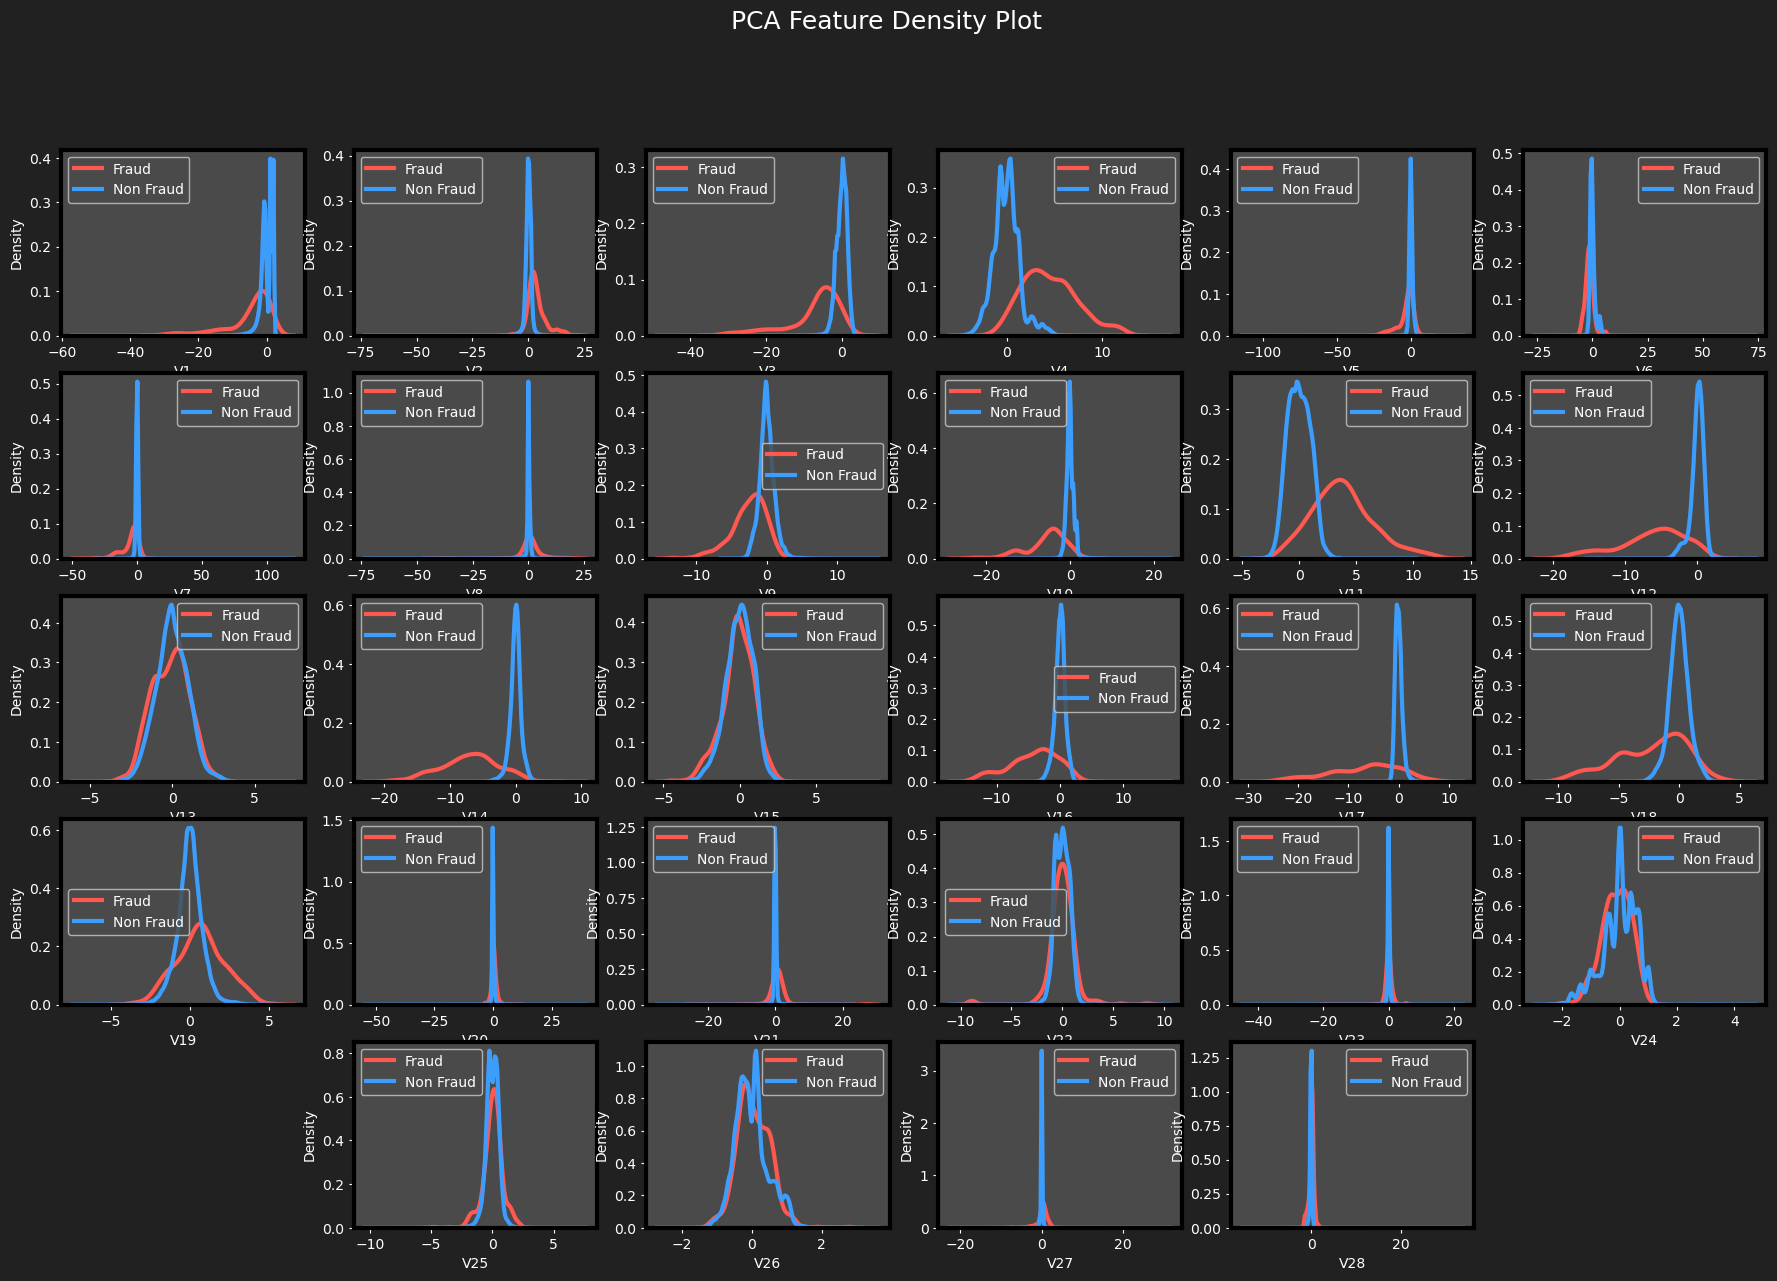

In [11]:
fig = plt.figure(figsize=(22, 14))
fig.tight_layout(pad=3.0)

# Plot parameters
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["xtick.color"] = colors[5]
plt.rcParams["ytick.color"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
plt.rcParams["text.color"] = colors[5]
plt.rcParams["figure.titlesize"] = 18
fig.patch.set_facecolor(colors[4])
plt.suptitle("PCA Feature Density Plot")

# Subplots
for idx, i in enumerate(df_eda.columns[1:-3]):
    # for centering last subplots
    if idx+1 >=25:
        idx += 1
        
    plt.subplot(5, 6, idx+1)
    sns.kdeplot(x=df_eda[df_eda['Class'] == 1][i], linewidth=3, color=colors[0])
    sns.kdeplot(x=df_eda[df_eda['Class'] == 0][i], linewidth=3, color=colors[1])
    
    plt.legend(labels=['Fraud', 'Non Fraud'])

In [12]:
# Number of entries with z score > 3 or < -3 for each feature variable
ol_df = (stats.zscore(np.abs(df_eda.iloc[:, 1:-2])) > 3).sum(axis=0).sort_values(ascending=False)

fig = px.bar(x=ol_df.index, y=ol_df)

fig.update_layout(title="Outliers in each Feature (except time features)", title_x=0.5, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="Feature", yaxis_title="Number of Outliers")
fig.update_traces(marker_color=colors[1])
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

In [13]:
# Number of entries with z score > 3 or < -3 for each feature variable and for each class
count = []
df_abs_z_score = pd.concat([stats.zscore(np.abs(df_eda.iloc[:, :-2])), df_eda['Class']], axis=1)
for i in df_eda.iloc[:, :-2].columns:
    count.append(df_abs_z_score[df_abs_z_score.loc[:, i]>3]['Class'].value_counts().values.tolist())

In [14]:
# Creating dataframe to help get data easily for the plot
ol_df2 = pd.DataFrame(count, columns=['Class 0', 'Class 1'], index=df_eda.iloc[:, :-2].columns).sort_values(by='Class 1', ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=ol_df2.index, y=ol_df2['Class 1'], marker_color=colors[0], name="Fraud"))
fig.add_trace(go.Scatter(x=ol_df2.index, y=ol_df2['Class 0'], marker_color=colors[1], name="Non Fraud"))

fig.update_layout(title="Outliers in each Feature: Frauds / Non Frauds", title_x=0.5, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="Feature", yaxis_title="Number of Outliers")
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

In [15]:
# Percent outliers
ol_df2['Ratio 0'] = (ol_df2['Class 0']/df_eda['Class'].value_counts()[0])
ol_df2['Ratio 1'] = (ol_df2['Class 1']/df_eda['Class'].value_counts()[1])
ol_df2['Percent 0'] = (ol_df2['Ratio 0']/(ol_df2['Ratio 0']+ol_df2['Ratio 1']))
ol_df2['Percent 1'] = (ol_df2['Ratio 1']/(ol_df2['Ratio 0']+ol_df2['Ratio 1']))
ol_df2.sort_values(by='Percent 0', ascending=False, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=ol_df2['Percent 0']*100, y=ol_df2.index, orientation='h', marker_color=colors[1], name="Non Fraud"))
fig.add_trace(go.Bar(x=ol_df2['Percent 1']*100, y=ol_df2.index, orientation='h', marker_color=colors[0], name="Fraud"))
fig.update_layout(barmode='stack', height=800, title="Percentage Proportion of Outliers", title_x=0.5, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], yaxis_title="Feature")
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

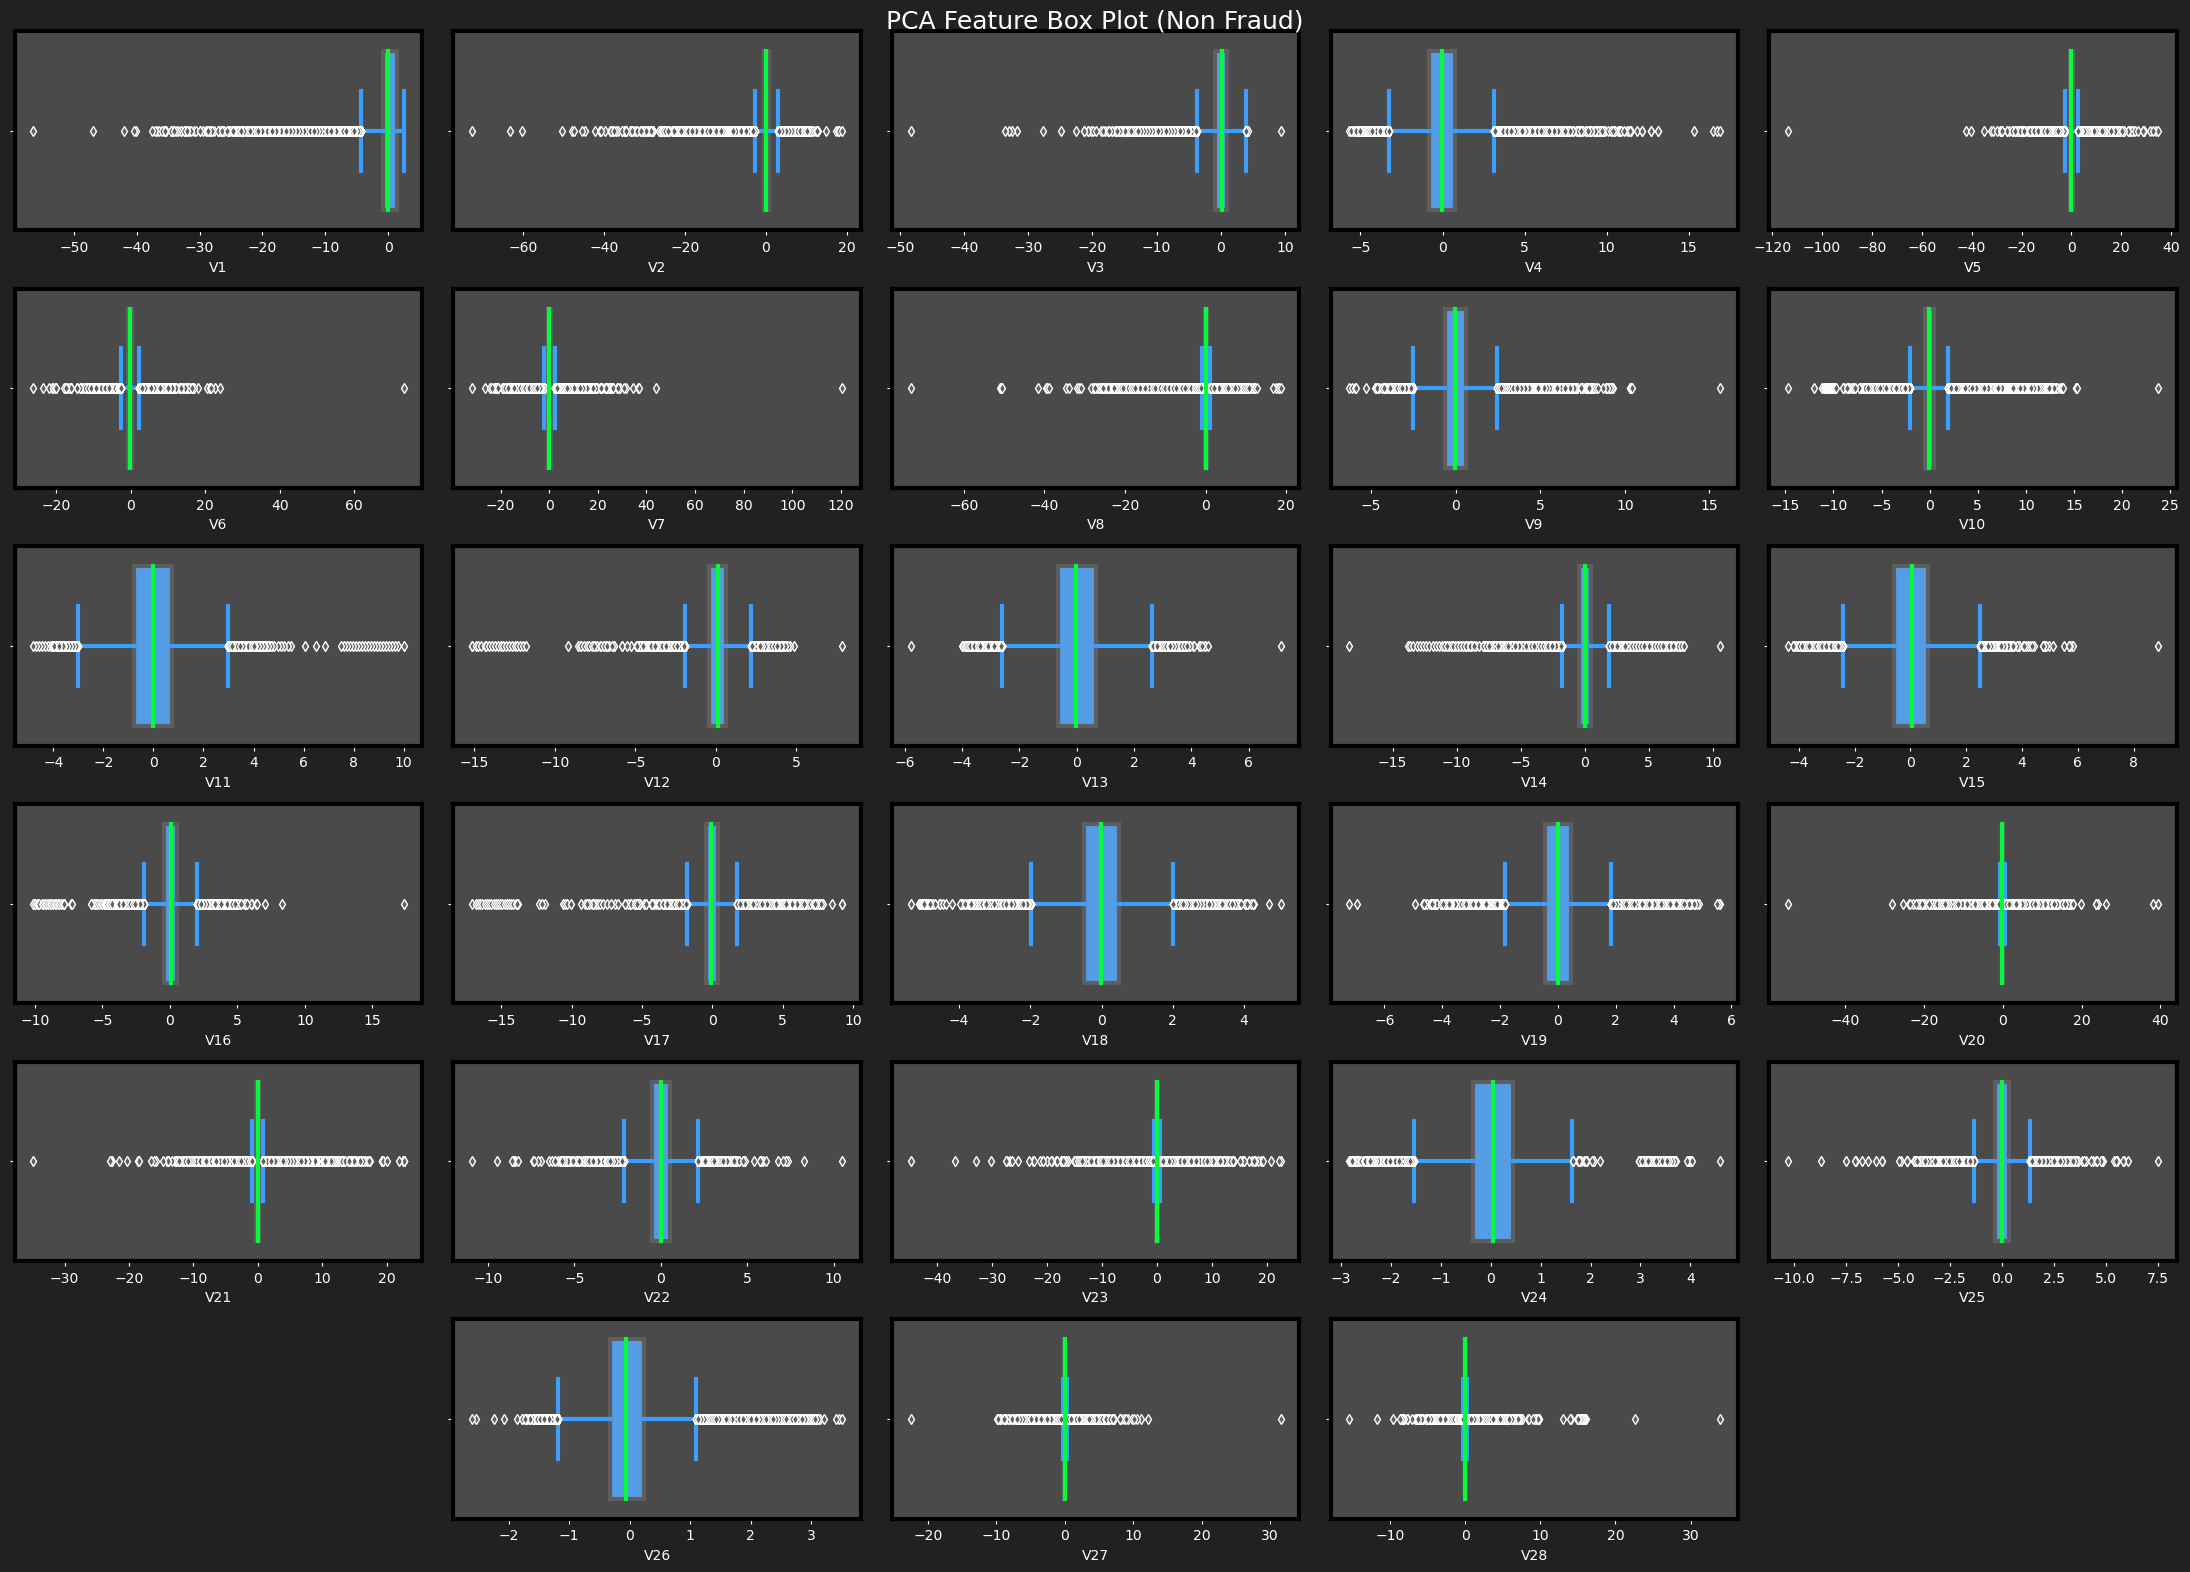

In [16]:
fig = plt.figure(figsize=(22, 16))

# Plot parameters
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["xtick.color"] = colors[5]
plt.rcParams["ytick.color"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
fig.patch.set_facecolor(colors[4])
plt.suptitle("PCA Feature Box Plot (Non Fraud)")

# Subplots
for idx, i in enumerate(df_eda.columns[1:-3]):
    # for centering last subplots
    if idx+1 >= 26:
        idx+=1
        
    plt.subplot(6, 5, idx+1)
    sns.boxplot(x=df_eda[df_eda['Class'] == 0][i], linewidth=3, palette=[colors[1]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[1]}, capprops={'color':colors[1]}, flierprops=dict(markeredgecolor=colors[5]))


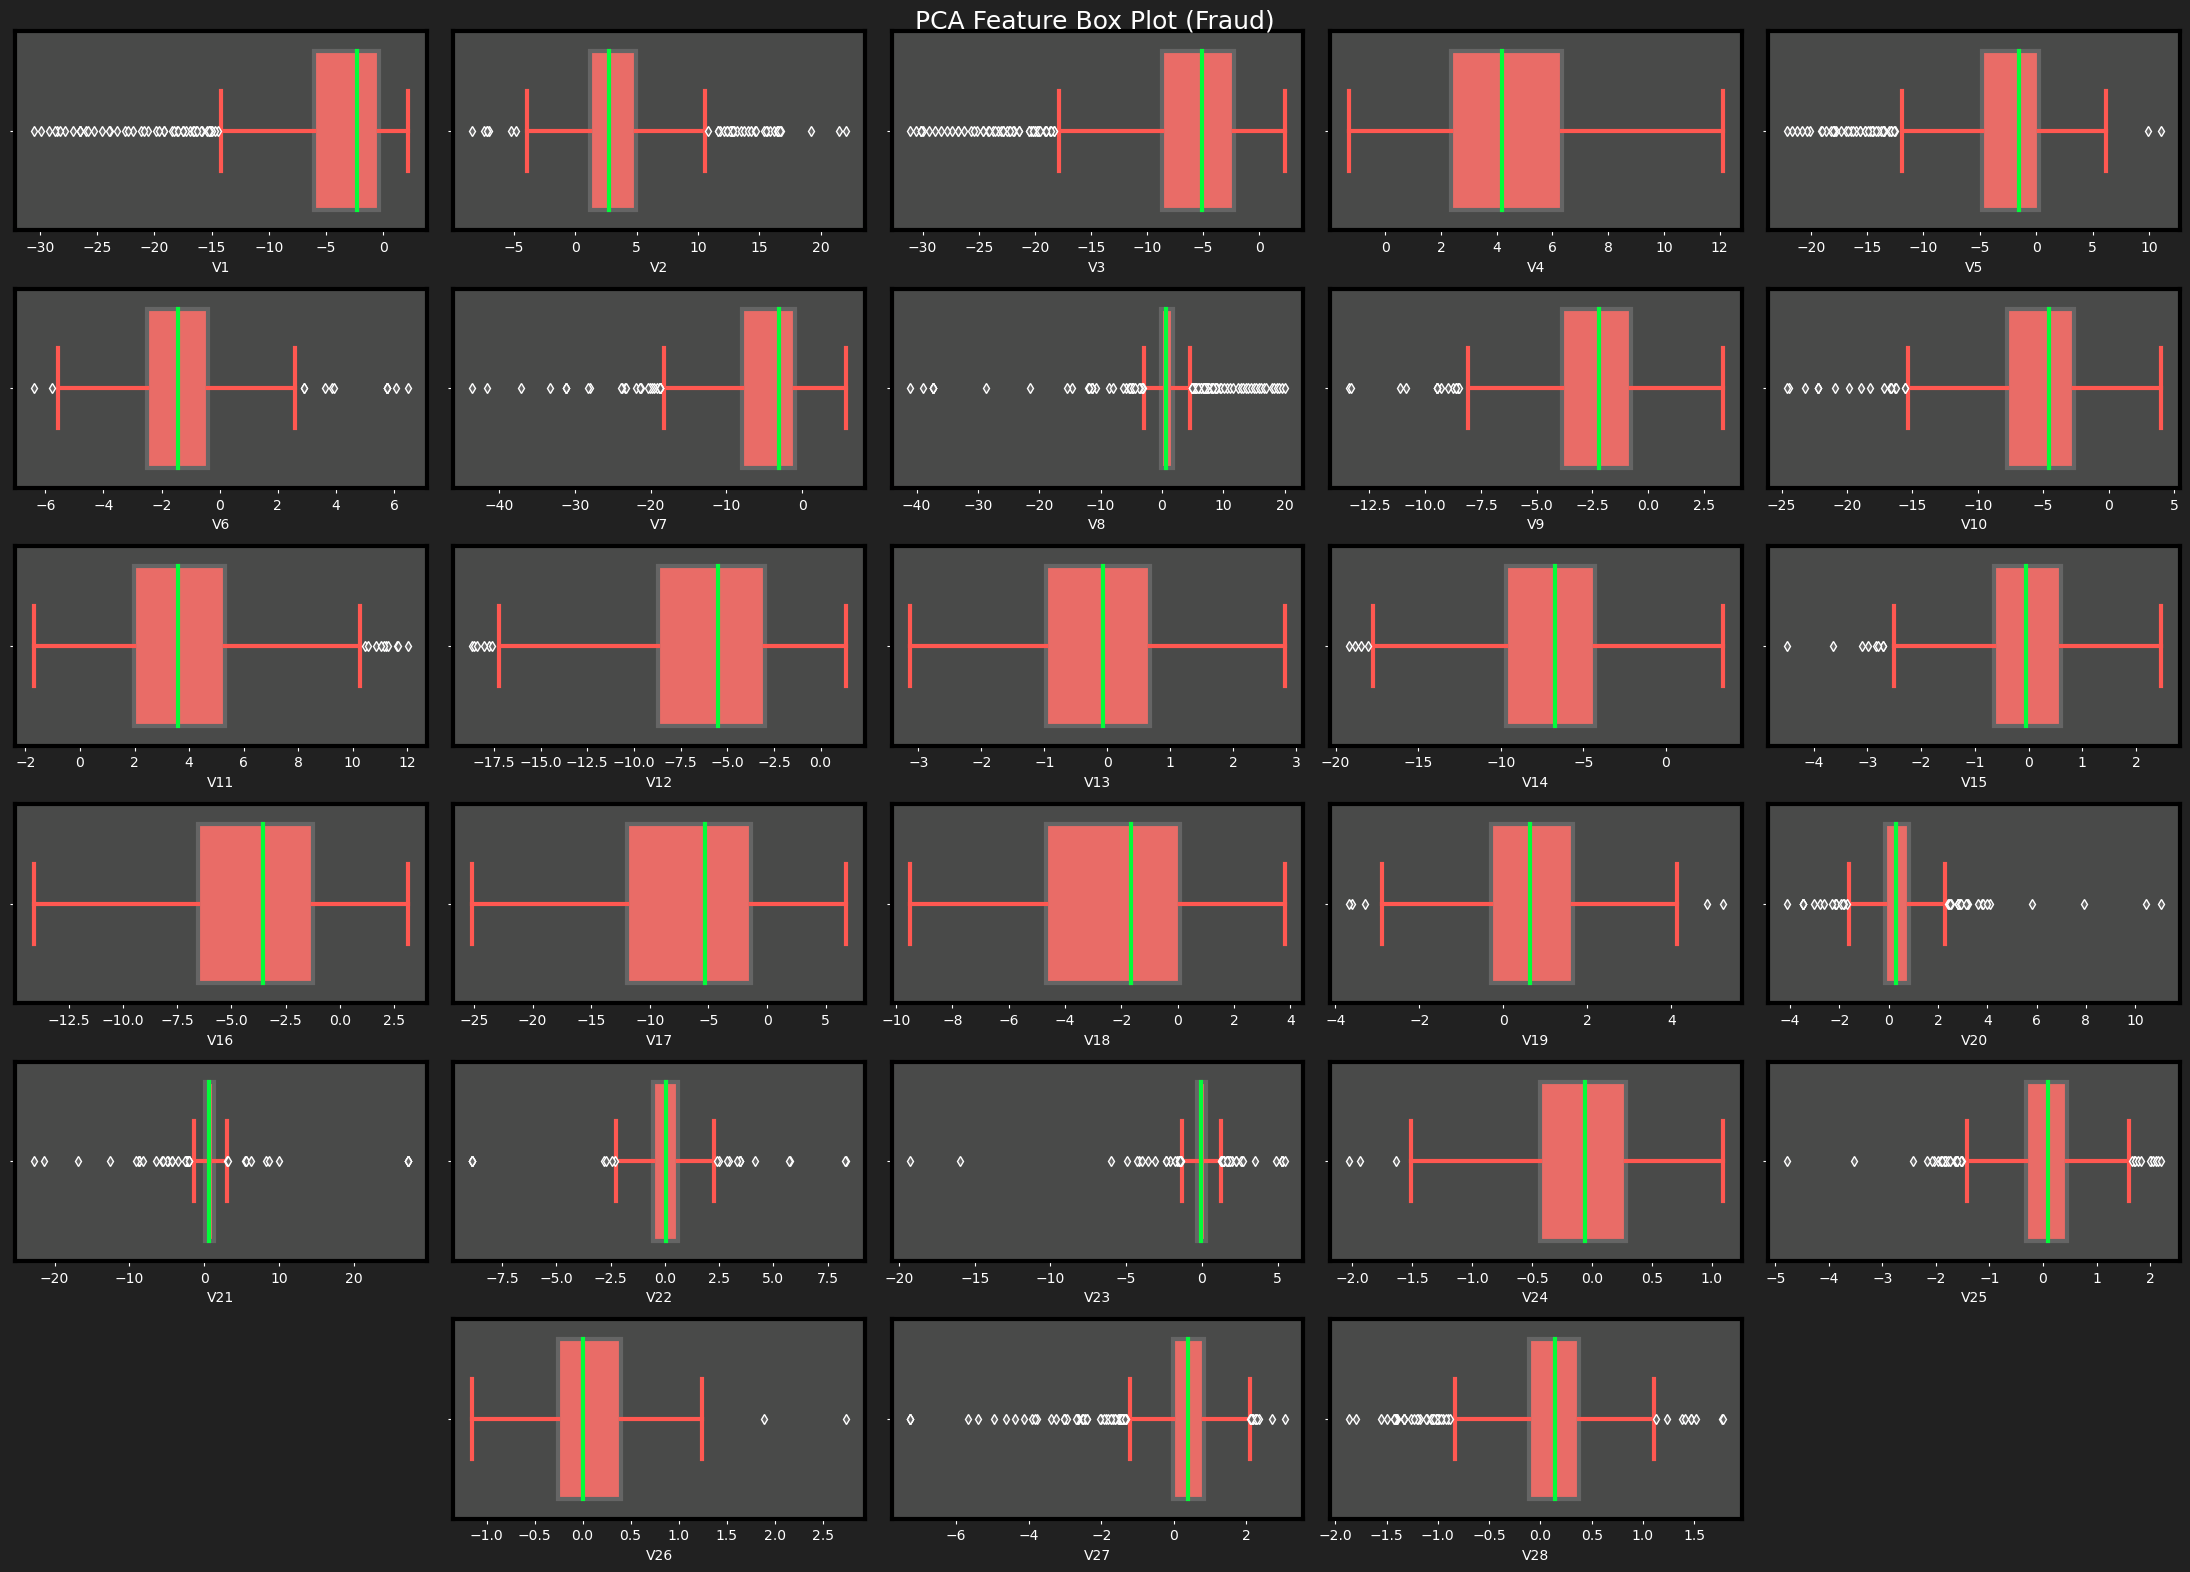

In [17]:
fig = plt.figure(figsize=(22, 16))

# Plot parameters
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["xtick.color"] = colors[5]
plt.rcParams["ytick.color"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
fig.patch.set_facecolor(colors[4])
plt.suptitle("PCA Feature Box Plot (Fraud)")

# Subplots
for idx, i in enumerate(df_eda.columns[1:-3]):
    # for centering last subplots
    if idx+1 >= 26:
        idx+=1
        
    plt.subplot(6, 5, idx+1)
    sns.boxplot(x=df_eda[df_eda['Class'] == 1][i], linewidth=3, palette=[colors[0]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[0]}, capprops={'color':colors[0]}, flierprops=dict(markeredgecolor=colors[5]))

<Axes: title={'center': 'Features Correlation Plot'}>

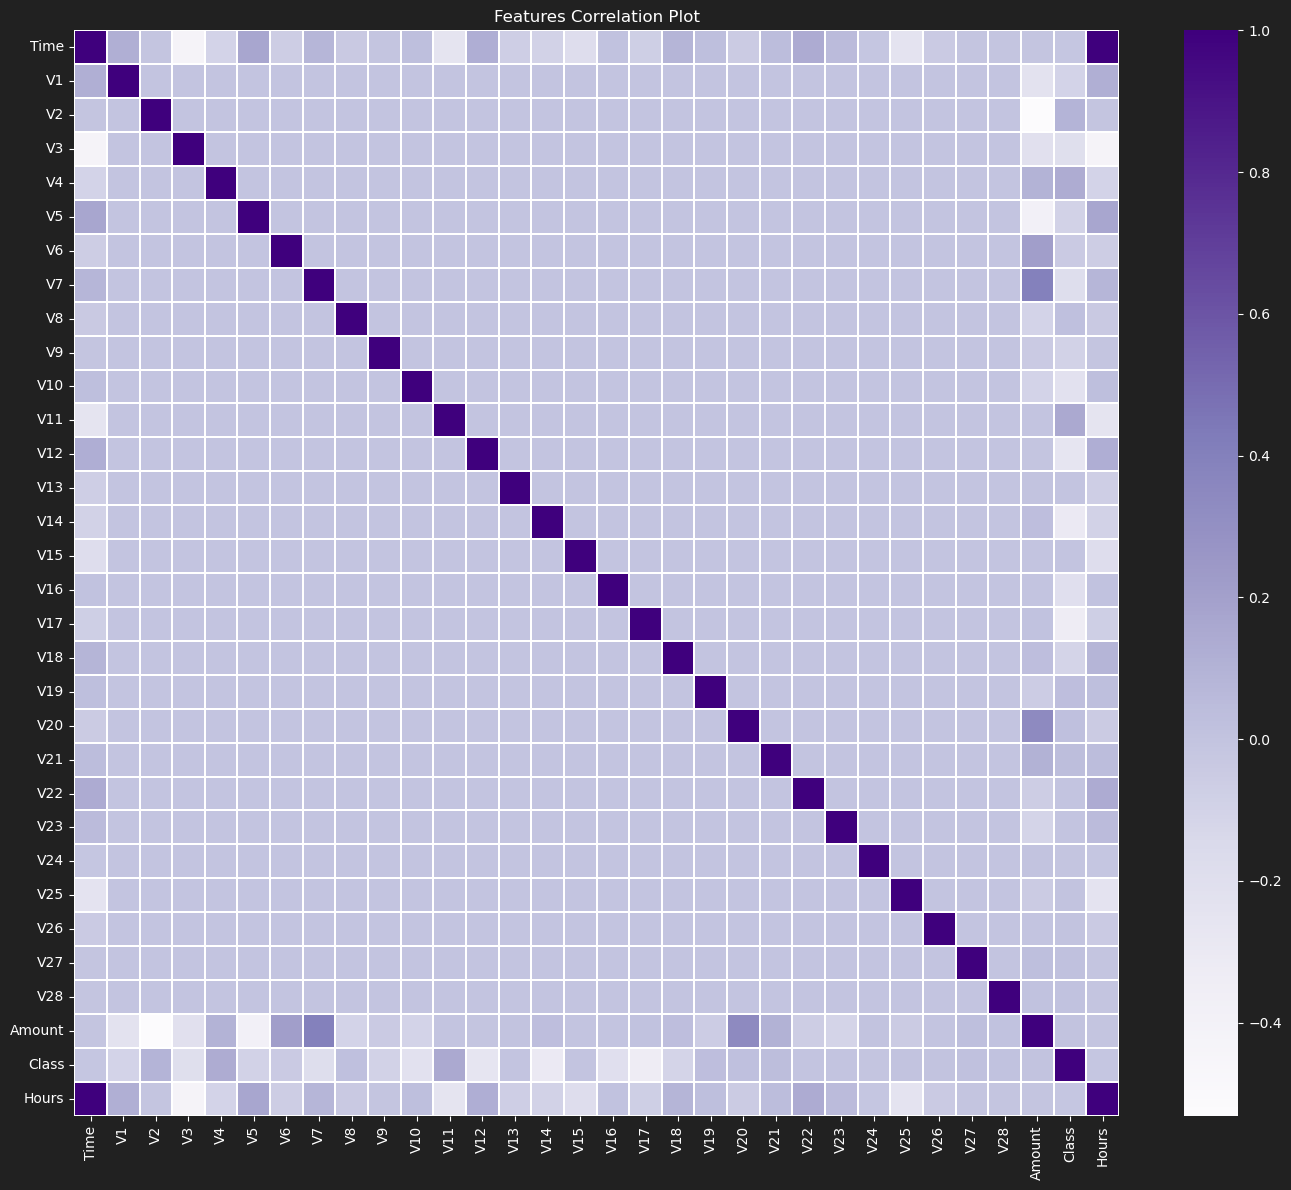

In [18]:
# Correlation plot
fig = plt.figure(figsize = (14,12))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.labelcolor"] = colors[5]
fig.patch.set_facecolor(colors[4])

plt.title('Features Correlation Plot')
corr = df_eda.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Purples")

In [19]:
# Features list
features = list(df_eda.columns)
features.remove('Class')
features.remove('Hours')

#################### widget 1 ####################
@widgets.interact(feature=features)
def display_feature_plots(feature="Time"):
    # Plot parameters
    fig = plt.figure(figsize = (24, 8))
    
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.facecolor"] = colors[3]
    plt.rcParams["axes.linewidth"] = 3
    plt.rcParams["xtick.color"] = colors[5]
    plt.rcParams["ytick.color"] = colors[5]
    plt.rcParams["axes.labelcolor"] = colors[5]
    fig.patch.set_facecolor(colors[4])
    plt.suptitle(f"Feature: {feature}")
    
    # Subplot axes
    ax1 = plt.subplot2grid(shape=(10, 9), loc=(0, 0), rowspan=3, colspan=3)
    ax2 = plt.subplot2grid(shape=(10, 9), loc=(3, 0), rowspan=3, colspan=3)
    ax3 = plt.subplot2grid(shape=(10, 9), loc=(0, 3), rowspan=6, colspan=4)
    ax4 = plt.subplot2grid(shape=(10, 9), loc=(0, 7), rowspan=6, colspan=2)
    ax5 = plt.subplot2grid(shape=(10, 9), loc=(7, 0), rowspan=2, colspan=9)
    
    ##### Axis 1 #####
    sns.boxplot(x=df_eda[df_eda['Class'] == 1][feature], linewidth=3, palette=[colors[0]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[0]}, capprops={'color':colors[0]}, flierprops=dict(markeredgecolor=colors[5]), ax=ax1)
    ax1.set_title(f"{feature} Boxplot (Non Fraud)")

    ##### Axis 2 #####
    sns.boxplot(x=df_eda[df_eda['Class'] == 0][feature], linewidth=3, palette=[colors[1]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[1]}, capprops={'color':colors[1]}, flierprops=dict(markeredgecolor=colors[5]), ax=ax2)
    ax2.set_title(f"{feature} Boxplot (Fraud)")
    
    ##### Axis 3 #####
    sns.kdeplot(x=df_eda[df_eda['Class'] == 1][feature], linewidth=3, color=colors[0], ax=ax3)
    sns.kdeplot(x=df_eda[df_eda['Class'] == 0][feature], linewidth=3, color=colors[1], ax=ax3)
    ax3.set_title(f"{feature} Density Plot")
    ax3.legend(labels=['Fraud', 'Non Fraud'])
    
    ##### Axis 4 #####
    ax4.text(-0.2, 0.15, f"""
                    Min: {round(df_eda[feature].min(), 4)}\n
                    Max: {round(df_eda[feature].max(), 4)}\n
                    Mean: {round(df_eda[feature].mean(), 4)}\n
                    Median: {round(df_eda[feature].median(), 4)}\n
                    Std: {round(df_eda[feature].std(), 4)}
                    """, fontsize=16)
    
    ##### Axis 5 #####
    # Ignoring time features
    value=np.nan if feature in ['Time'] else 100
    
    bar1 = sns.barplot(x=[value], y=[ol_df2.index.tolist().index(feature)], orient='h', color=colors[1], ax=ax5)
    bar2 = sns.barplot(x=[ol_df2['Percent 1'][feature]*100], y=[ol_df2.index.tolist().index(feature)], orient='h', color=colors[0], ax=ax5)
    
    # Annotation and legend
    if feature not in ['Time']:
        bar1.text(0.1,0.1,f"{round(ol_df2['Percent 1'][feature]*100, 2)} %", fontsize=18)
        bar2.text(99.9,0.1,f"{round(ol_df2['Percent 0'][feature]*100, 2)} %", fontsize=18)
        right_bar = mpatches.Patch(color=colors[1], label='Non Fraud')
        left_bar = mpatches.Patch(color=colors[0], label='Fraud')
        ax5.legend(handles=[right_bar, left_bar], loc='center')
        ax5.set_title(f"Percent Proportion of outliers in {feature} Feature")
        
        
#################### widget 2 ####################
@widgets.interact(feature1=features, feature2=features)
def display_feature_plots(feature1="V1", feature2="V2"):
    #plot parameters
    fig = plt.figure(figsize = (12, 8))
    
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.facecolor"] = colors[3]
    plt.rcParams["axes.linewidth"] = 3
    plt.rcParams["xtick.color"] = colors[5]
    plt.rcParams["ytick.color"] = colors[5]
    plt.rcParams["axes.labelcolor"] = colors[5]
    fig.patch.set_facecolor(colors[4])
    
    sns.scatterplot(x=df_eda[feature1], y=df_eda[feature2], hue=df_eda['Class'], palette=[colors[1], colors[0]])
    scatter0 = mpatches.Patch(color=colors[1], label='Non Fraud')
    scatter1 = mpatches.Patch(color=colors[0], label='Fraud')
    plt.legend(handles=[scatter0, scatter1])
    plt.xlabel(f"{feature1}")
    plt.ylabel(f"{feature2}")
    plt.title(f'"{feature2}" vs "{feature1}" Scatter Plot')

interactive(children=(Dropdown(description='feature', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7…

interactive(children=(Dropdown(description='feature1', index=1, options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5',…